In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
filepath = "/content/BASE DE DATOS 2025 - ACTUAL1.xlsx"
df = pd.read_excel(filepath)

In [5]:
df.head()

,Paciente,Horas,Tiempo,TAS,TAD,TAM,FR,FC,SPO2,T°,Tamaño derecho,Reacción derecha,Tamaño Izquierdo,Reaccion Izquierda,PIC,Escala de glasgow,Escala de rass,Escala de ranking,medicación,Nombre del medicamento
0,1,16:00:00,0 hora,107,60,69,16,54,100,36.1,2,1,2,1,.,15,.,0,2,.
1,1,17:00:00,1 hora,100,60,70,15,57,100,36.1,2,1,2,1,.,15,.,0,2,.
2,1,18:00:00,2 hora,114,74,87,13,51,100,36.2,2,1,2,1,.,15,.,0,2,.
3,1,19:00:00,3 hora,114,76,87,10,59,99,36.0,2,1,2,1,.,15,.,0,2,.
4,1,20:00:00,4 hora,113,67,82,11,55,100,36.3,2,1,3,1,.,15,.,0,2,.


Esto es como un primer vistaso de los datos

In [6]:
df.columns

Index(['Paciente ', 'Horas ', 'Tiempo', 'TAS ', 'TAD ', 'TAM  ', 'FR ', 'FC ',
       'SPO2', 'T°', 'Tamaño derecho ', 'Reacción derecha ',
       'Tamaño  Izquierdo', 'Reaccion Izquierda', 'PIC ', 'Escala de glasgow',
       'Escala de rass', 'Escala de ranking', 'medicación ',
       'Nombre del medicamento '],
      dtype='object')

## Proporción general de eventos injuriantes

In [7]:
df['EventoInjuriante'] = (
    (df['TAS '] < 110) |
    (df['TAD '] < 50) |
    (df['TAM  '] < 60) | (df['TAM  '] > 150) |
    (df['FC '] < 90) |
    (df['FR '] < 12) | (df['FR '] > 20) |
    (df['SPO2'] < 93) |
    (df['T°'] > 37)
).astype(int)

In [8]:
df['EventoInjuriante'].sum()

np.int64(1317)

In [ ]:
proporcion_general = df['EventoInjuriante'].mean()
print(proporcion_general*100)


89.59183673469387


En general el 89.6% de los registros presentaros al menos un evento injuriantes a lo largo del tiempo

## Cantidad de eventos simultaneos

In [17]:
df['TotalEventosInjuriante'] = (
    (df['TAS '] < 110).astype(int) +
    (df['TAD '] < 50).astype(int) +
    ((df['TAM  '] < 60) | (df['TAM  '] > 150)).astype(int) +
    (df['FC '] < 90).astype(int) +
    ((df['FR '] < 12) | (df['FR '] > 20)).astype(int) +
    (df['SPO2'] < 93).astype(int) +
    (df['T°'] > 37).astype(int)
)

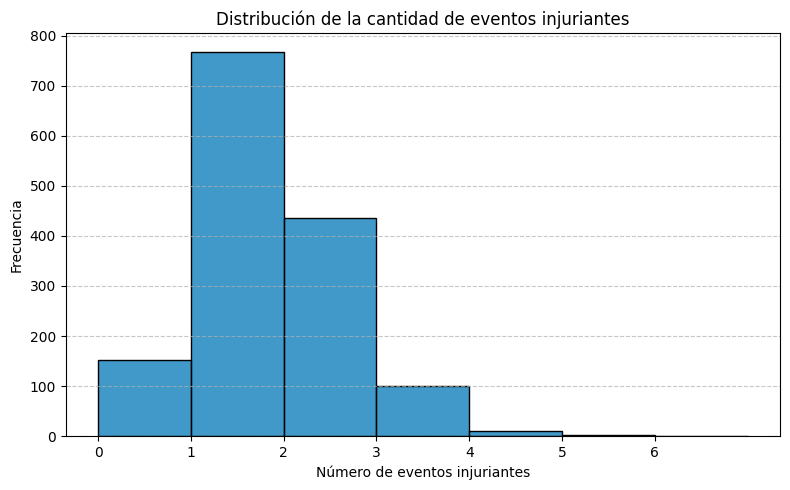

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['TotalEventosInjuriante'], bins=range(df['TotalEventosInjuriante'].max() + 2), color='#0077b6', edgecolor='black')

plt.title('Distribución de la cantidad de eventos injuriantes')
plt.xlabel('Número de eventos injuriantes')
plt.ylabel('Frecuencia')
plt.xticks(range(df['TotalEventosInjuriante'].max() + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Este es un histograma de el número de eventos injuriantes que se presentaron, se observa que la mayoría de las observaciones presentan entre 2 y 3 eventos injuriantes simultáneos etc etc....

## Proporción de tiempo con eventos por paciente

In [11]:
proporcion_paciente = df.groupby('Paciente ')['EventoInjuriante'].mean()
redondeado_paciente = round(proporcion_paciente*100, 1)
redondeado_paciente

,EventoInjuriante
Paciente,
1,100.0
2,100.0
3,100.0
4,98.0
5,55.1
6,100.0
7,98.0
8,98.0
9,83.7


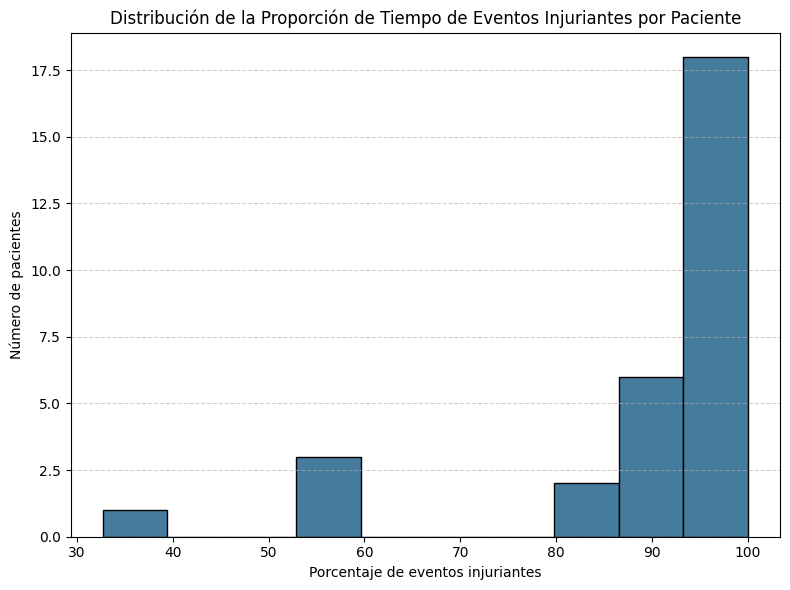

In [12]:
plt.figure(figsize=(8, 6))
plt.hist(redondeado_paciente, bins=10, color='#457b9d', edgecolor='black')
plt.title('Distribución de la Proporción de Tiempo de Eventos Injuriantes por Paciente')
plt.xlabel('Porcentaje de eventos injuriantes')
plt.ylabel('Número de pacientes')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Este histograma representa la distribución del porcentaje de tiempo en el que los pacientes presentaron eventos injuriantes durante el periodo de observación. Una proporción considerable de pacientes presentó eventos injuriantes durante la totalidad de las 48 horas etc etc .... ...


## Relación entre eventos injuriantes y escala de Ranking al egreso

In [16]:
df.columns

Index(['Paciente ', 'Horas ', 'Tiempo', 'TAS ', 'TAD ', 'TAM  ', 'FR ', 'FC ',
       'SPO2', 'T°', 'Tamaño derecho ', 'Reacción derecha ',
       'Tamaño  Izquierdo', 'Reaccion Izquierda', 'PIC ', 'Escala de glasgow',
       'Escala de rass', 'Escala de ranking', 'medicación ',
       'Nombre del medicamento ', 'EventoInjuriante'],
      dtype='object')

<ipython-input-19-44f9403aa0de>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Escala de ranking', y='TotalEventosInjuriante', palette='viridis')


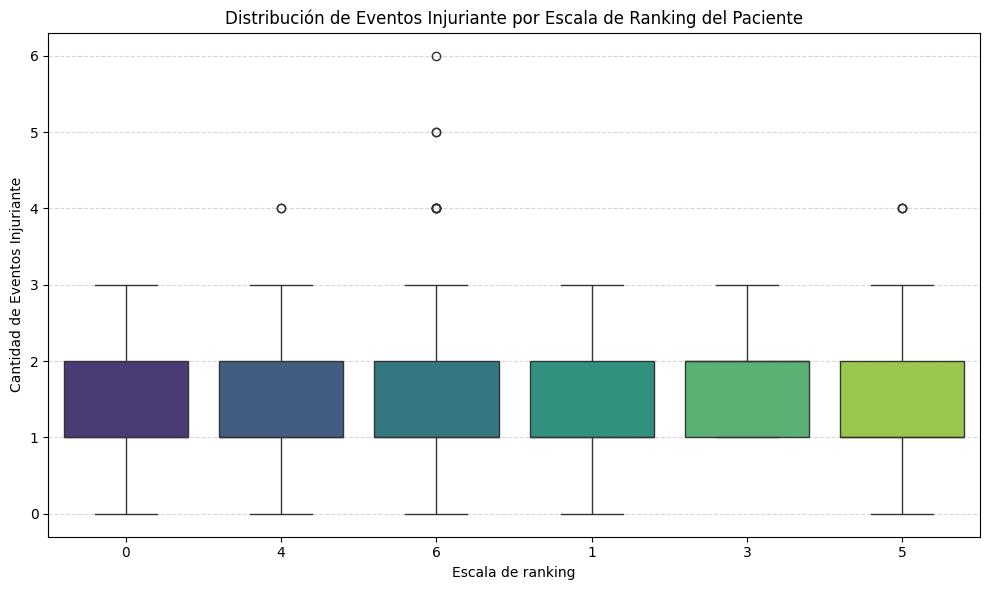

In [19]:
df['Escala de ranking'] = df['Escala de ranking'].astype(str)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Escala de ranking', y='TotalEventosInjuriante', palette='viridis')
plt.title('Distribución de Eventos Injuriante por Escala de Ranking del Paciente')
plt.xlabel('Escala de ranking')
plt.ylabel('Cantidad de Eventos Injuriante')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Este gráfico permite identificar si hay alguna tendencia en los eventos injuriantes conforme a la salida del paciente según la escala de ranking. Por ejemplo, si los pacientes con escala más alta (6) tienden a presentar más eventos injuriantes, o si hay alta dispersión dentro de cada categoría etc etc etc ....

In [56]:
from scipy.stats import kstest, norm
import numpy as np
media = np.mean(df['TotalEventosInjuriante'])
desv = np.std(df['TotalEventosInjuriante'])
stat, p = kstest(df['TotalEventosInjuriante'], 'norm', args=(media, desv))
print(f"KS Estadístico = {stat:.4f}, p-valor = {p:.4f}")
if p > 0.05:
    print("Los datos son compatibles con una distribución normal.")
else:
    print("Los datos no siguen distribución normal.")

KS Estadístico = 0.2984, p-valor = 0.0000
Los datos no siguen distribución normal.


### Kruskall para diferencias entre grupos segun la escala de ranking

In [50]:
import pandas as pd
from scipy.stats import kruskal
import seaborn as sns
import matplotlib.pyplot as plt

grupos = [grupo['TotalEventosInjuriante'].values for name, grupo in df.groupby('Escala de ranking')]
stat, p = kruskal(*grupos)
print(f"Kruskal-Wallis - Estadístico H: {stat}")
print(f"Valor p: {p}")




Kruskal-Wallis - Estadístico H: 17.42560292133569
Valor p: 0.0037595096062601045


El valor p obtenido es 0.0038, lo cual es significativamente menor que 0.05. Esto indica que existen diferencias significativas en el promedio de eventos injuriantes entre los distintos niveles de la Escala de Ranking (de 0 a 6). Osea, el nivel de salida del paciente, según esta escala, influye en la cantidad de eventos injuriantes que presenta etc etc....

In [42]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(
    endog=df['TotalEventosInjuriante'],
    groups=df['Escala de ranking'],
    alpha=0.05
)

print(tukey.summary())


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  -0.0313 0.9977 -0.2294  0.1668  False
     0      3   0.4014 0.0154   0.048  0.7547   True
     0      4   0.0034    1.0 -0.1855  0.1923  False
     0      5   0.1395  0.284 -0.0494  0.3283  False
     0      6   0.1565 0.1697 -0.0324  0.3453  False
     1      3   0.4327 0.0077  0.0743   0.791   True
     1      4   0.0347 0.9962 -0.1634  0.2328  False
     1      5   0.1707 0.1369 -0.0273  0.3688  False
     1      6   0.1878 0.0748 -0.0103  0.3858  False
     3      4   -0.398 0.0168 -0.7513 -0.0446   True
     3      5  -0.2619 0.2798 -0.6152  0.0914  False
     3      6  -0.2449 0.3555 -0.5982  0.1084  False
     4      5   0.1361 0.3114 -0.0528  0.3249  False
     4      6   0.1531 0.1895 -0.0358  0.3419  False
     5      6    0.017 0.9998 -0.1718  0.2059  False
----------------------------------------------

## Eventos con la Hora

In [63]:
df['Hora'] = df['Horas '].str.extract(r'(\d{2}:\d{2}:\d{2})')


In [52]:
df['Hora'] = pd.to_datetime(df['Hora'], format='%H:%M:%S').dt.time

In [60]:
eventos_por_hora = df.groupby('Hora')['TotalEventosInjuriante'].max()
eventos_por_hora

,TotalEventosInjuriante
Hora,
00:00:00,3
01:00:00,4
02:00:00,3
03:00:00,3
04:00:00,3
05:00:00,3
06:00:00,3
07:00:00,4
08:00:00,4


Aqui en esta tablita se ve el mayor numero de eventos injuriantes simultaneos que ocurrio por cada hora

In [69]:
df['Horan'] = pd.to_datetime(df['Hora']).dt.hour

<ipython-input-69-a70d4e0f780b>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Horan'] = pd.to_datetime(df['Hora']).dt.hour


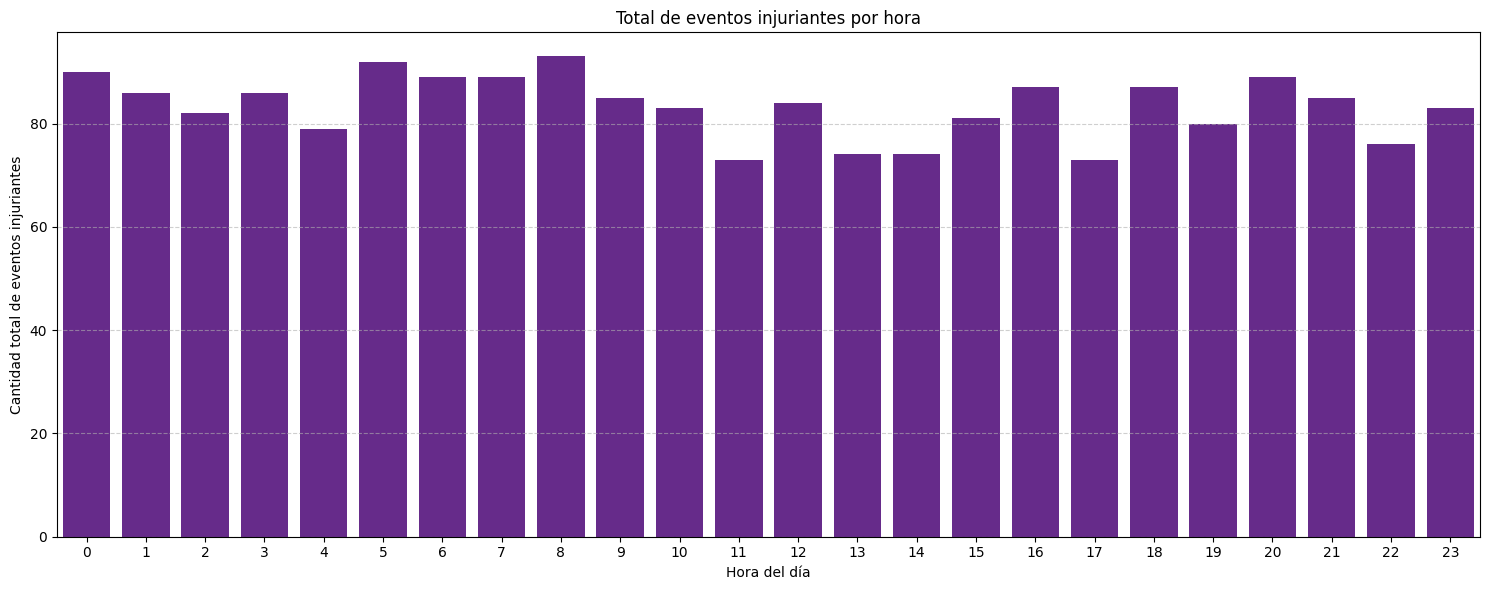

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

eventos_por_hora = df.groupby('Horan')['TotalEventosInjuriante'].sum().reset_index()

plt.figure(figsize=(15, 6))
sns.barplot(data=eventos_por_hora, x='Horan', y='TotalEventosInjuriante', color='#6a1b9a')

plt.title('Total de eventos injuriantes por hora')
plt.xlabel('Hora del día')
plt.ylabel('Cantidad total de eventos injuriantes')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


<ipython-input-74-f8eb18c3c2da>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Horan', y='TotalEventosInjuriante', palette='viridis')


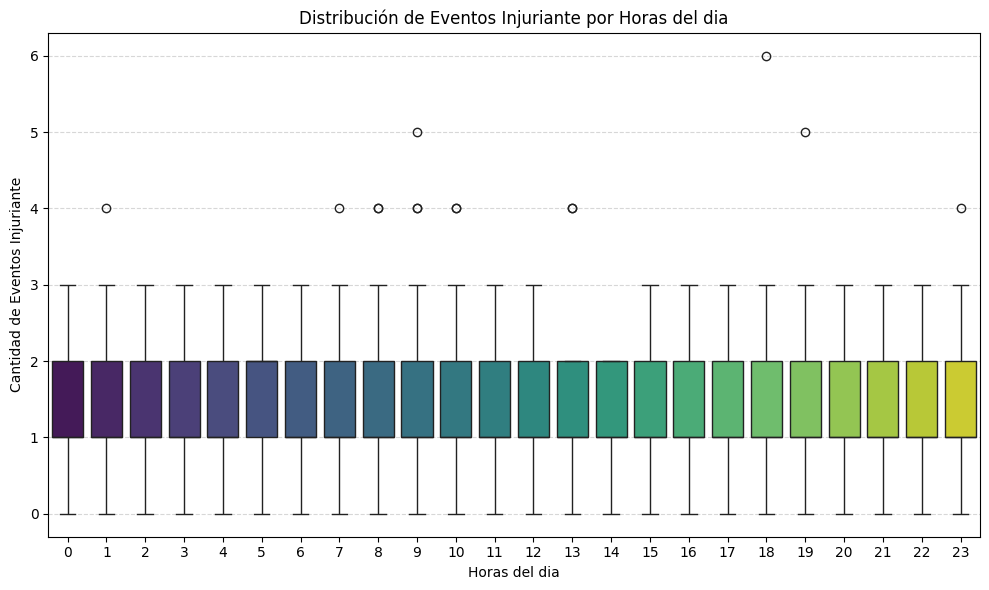

In [74]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Horan', y='TotalEventosInjuriante', palette='viridis')
plt.title('Distribución de Eventos Injuriante por Horas del dia')
plt.xlabel('Horas del dia')
plt.ylabel('Cantidad de Eventos Injuriante')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

En general no se muestra una diferencia entre las horas, como si las horas no influyeran en la cantidad de eventos que pueda tener un paciente etc etc etc

In [75]:
from scipy.stats import kruskal
grupos_hora = [df[df['Hora'] == h]['TotalEventosInjuriante'] for h in df['Hora'].unique()]
kruskal_result = kruskal(*grupos_hora)
print("Kruskal-Wallis:")
print(kruskal_result)


Kruskal-Wallis:
KruskalResult(statistic=np.float64(22.01197045827109), pvalue=np.float64(0.519529211162266))


In [82]:
eventos_por_paciente_hora = df.groupby(['Paciente ', 'Hora'])['TotalEventosInjuriante'].sum().reset_index()
ranking_final = df.groupby('Paciente ')['Escala de ranking'].last()
resultados = []
for paciente, grupo in eventos_por_paciente_hora.groupby('Paciente '):
    max_eventos = grupo['TotalEventosInjuriante'].max()
    horas_max = grupo[grupo['TotalEventosInjuriante'] == max_eventos]['Hora'].tolist()

    resultados.append({
        'Paciente': paciente,
        'Hora(s) pico': horas_max,
        'Máx eventos en esa hora': int(max_eventos),
        'Escala de Ranking': ranking_final.loc[paciente]
    })
df_resultados = pd.DataFrame(resultados)
df_resultados

,Paciente,Hora(s) pico,Máx eventos en esa hora,Escala de Ranking
0,1,[16:00:00],5,0
1,2,[23:00:00],6,4
2,3,[18:00:00],10,6
3,4,[18:00:00],5,1
4,5,"[04:00:00, 08:00:00, 18:00:00]",3,4
5,6,[07:00:00],7,3
6,7,[03:00:00],5,4
7,8,"[20:00:00, 21:00:00]",4,4
8,9,[16:00:00],5,1
9,10,"[10:00:00, 11:00:00, 12:00:00, 16:00:00, 18:00...",3,1


##  Relación entre eventos injuriantes y medicación

In [ ]:
eventos_medicacion = df.groupby('medicación ')['EventoInjuriante'].mean()
eventos_medicacion

,EventoInjuriante
medicación,
1,0.885350
2,0.897182


En esta tablita se muesta la probabilidad de eventos injuriantes por medicacion, en este caso no hay mucha diferencia entre ambas disminuye muy poco la probabilidad si hay medicamento

In [78]:
from scipy.stats import mannwhitneyu
grupo_med_si = df[df['medicación '] == 1]['TotalEventosInjuriante']
grupo_med_no = df[df['medicación '] == 2]['TotalEventosInjuriante']
stat, p = mannwhitneyu(grupo_med_si, grupo_med_no, alternative='two-sided')
print("Estadístico U:", stat)
print("p-valor:", p)


Estadístico U: 105356.0
p-valor: 0.6179452525142354


In [81]:

def graficar_eventos_por_hora_paciente(paciente_id):
    df_paciente = df[df['Paciente '] == paciente_id]

    eventos_por_hora = df_paciente.groupby('Horan')['EventoInjuriante'].sum().reset_index()
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=eventos_por_hora, x='Horan', y='EventoInjuriante', marker='o', color='purple')

    plt.title(f'Eventos injuriantes por hora - Paciente {paciente_id}')
    plt.xlabel('Hora del día')
    plt.ylabel('Cantidad de eventos injuriantes')
    plt.xticks(range(0, 24))
    plt.grid(True)
    plt.tight_layout()
    plt.show()

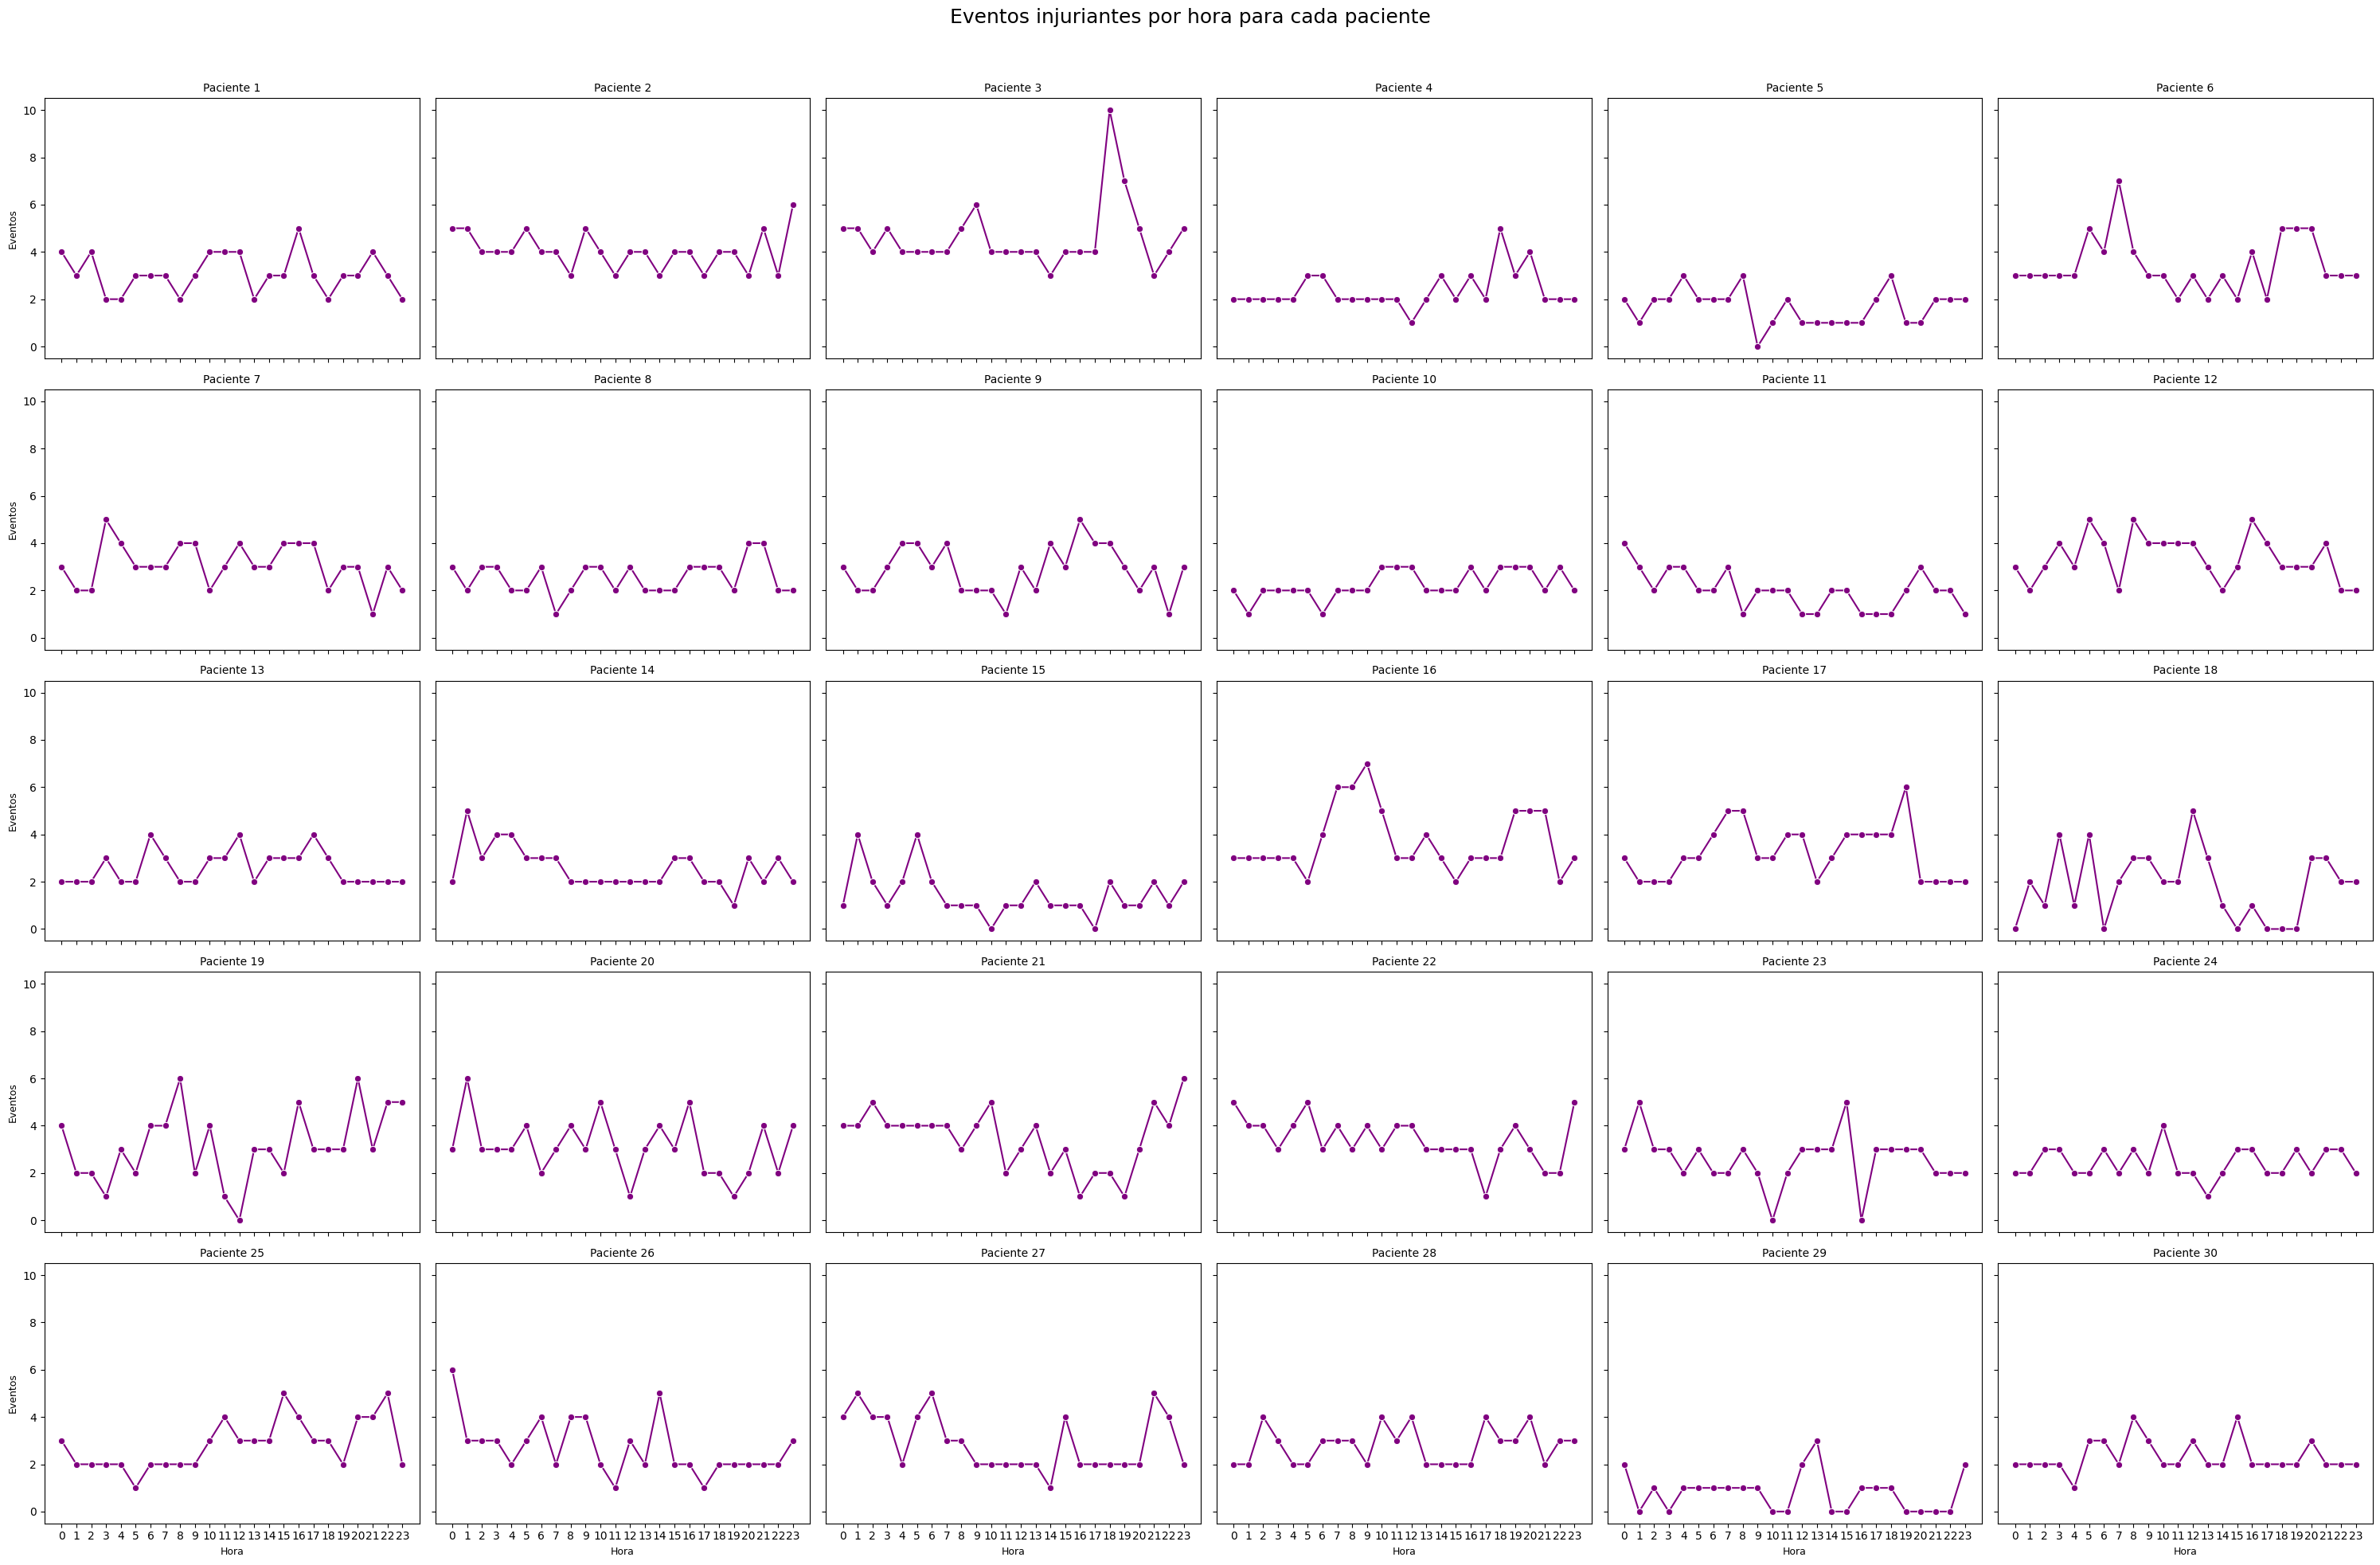

In [80]:
pacientes_unicos = df['Paciente '].unique()

fig, axs = plt.subplots(5, 6, figsize=(30, 20), sharex=True, sharey=True)
axs = axs.flatten()

for i, paciente in enumerate(pacientes_unicos[:30]):
    ax = axs[i]

    df_paciente = df[df['Paciente '] == paciente]
    eventos_por_hora = df_paciente.groupby('Horan')['TotalEventosInjuriante'].sum().reset_index()

    sns.lineplot(data=eventos_por_hora, x='Horan', y='TotalEventosInjuriante', marker='o', ax=ax, color='purple')
    ax.set_title(f'Paciente {paciente}', fontsize=10)
    ax.set_xticks(range(0, 24))

    if i >= 24:
        ax.set_xlabel('Hora', fontsize=9)
    else:
        ax.set_xlabel('')

    if i % 6 == 0:
        ax.set_ylabel('Eventos', fontsize=9)
    else:
        ax.set_ylabel('')

for j in range(len(pacientes_unicos), 30):
    fig.delaxes(axs[j])

fig.suptitle('Eventos injuriantes por hora para cada paciente', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Estos son 30 gráficos de líneas (5 filas × 6 columnas), donde cada gráfico corresponde a un paciente individual. Se representa la cantidad de eventos injuriantes registrados en cada hora del día, El eje X (el horizontal)  muestra las horas (de 0 a 23) y el eje Y indica la frecuencia de eventos injuriantes.

In [ ]:
df['TiempoNum'] = df['Tiempo'].str.extract('(\d+)').astype(int)


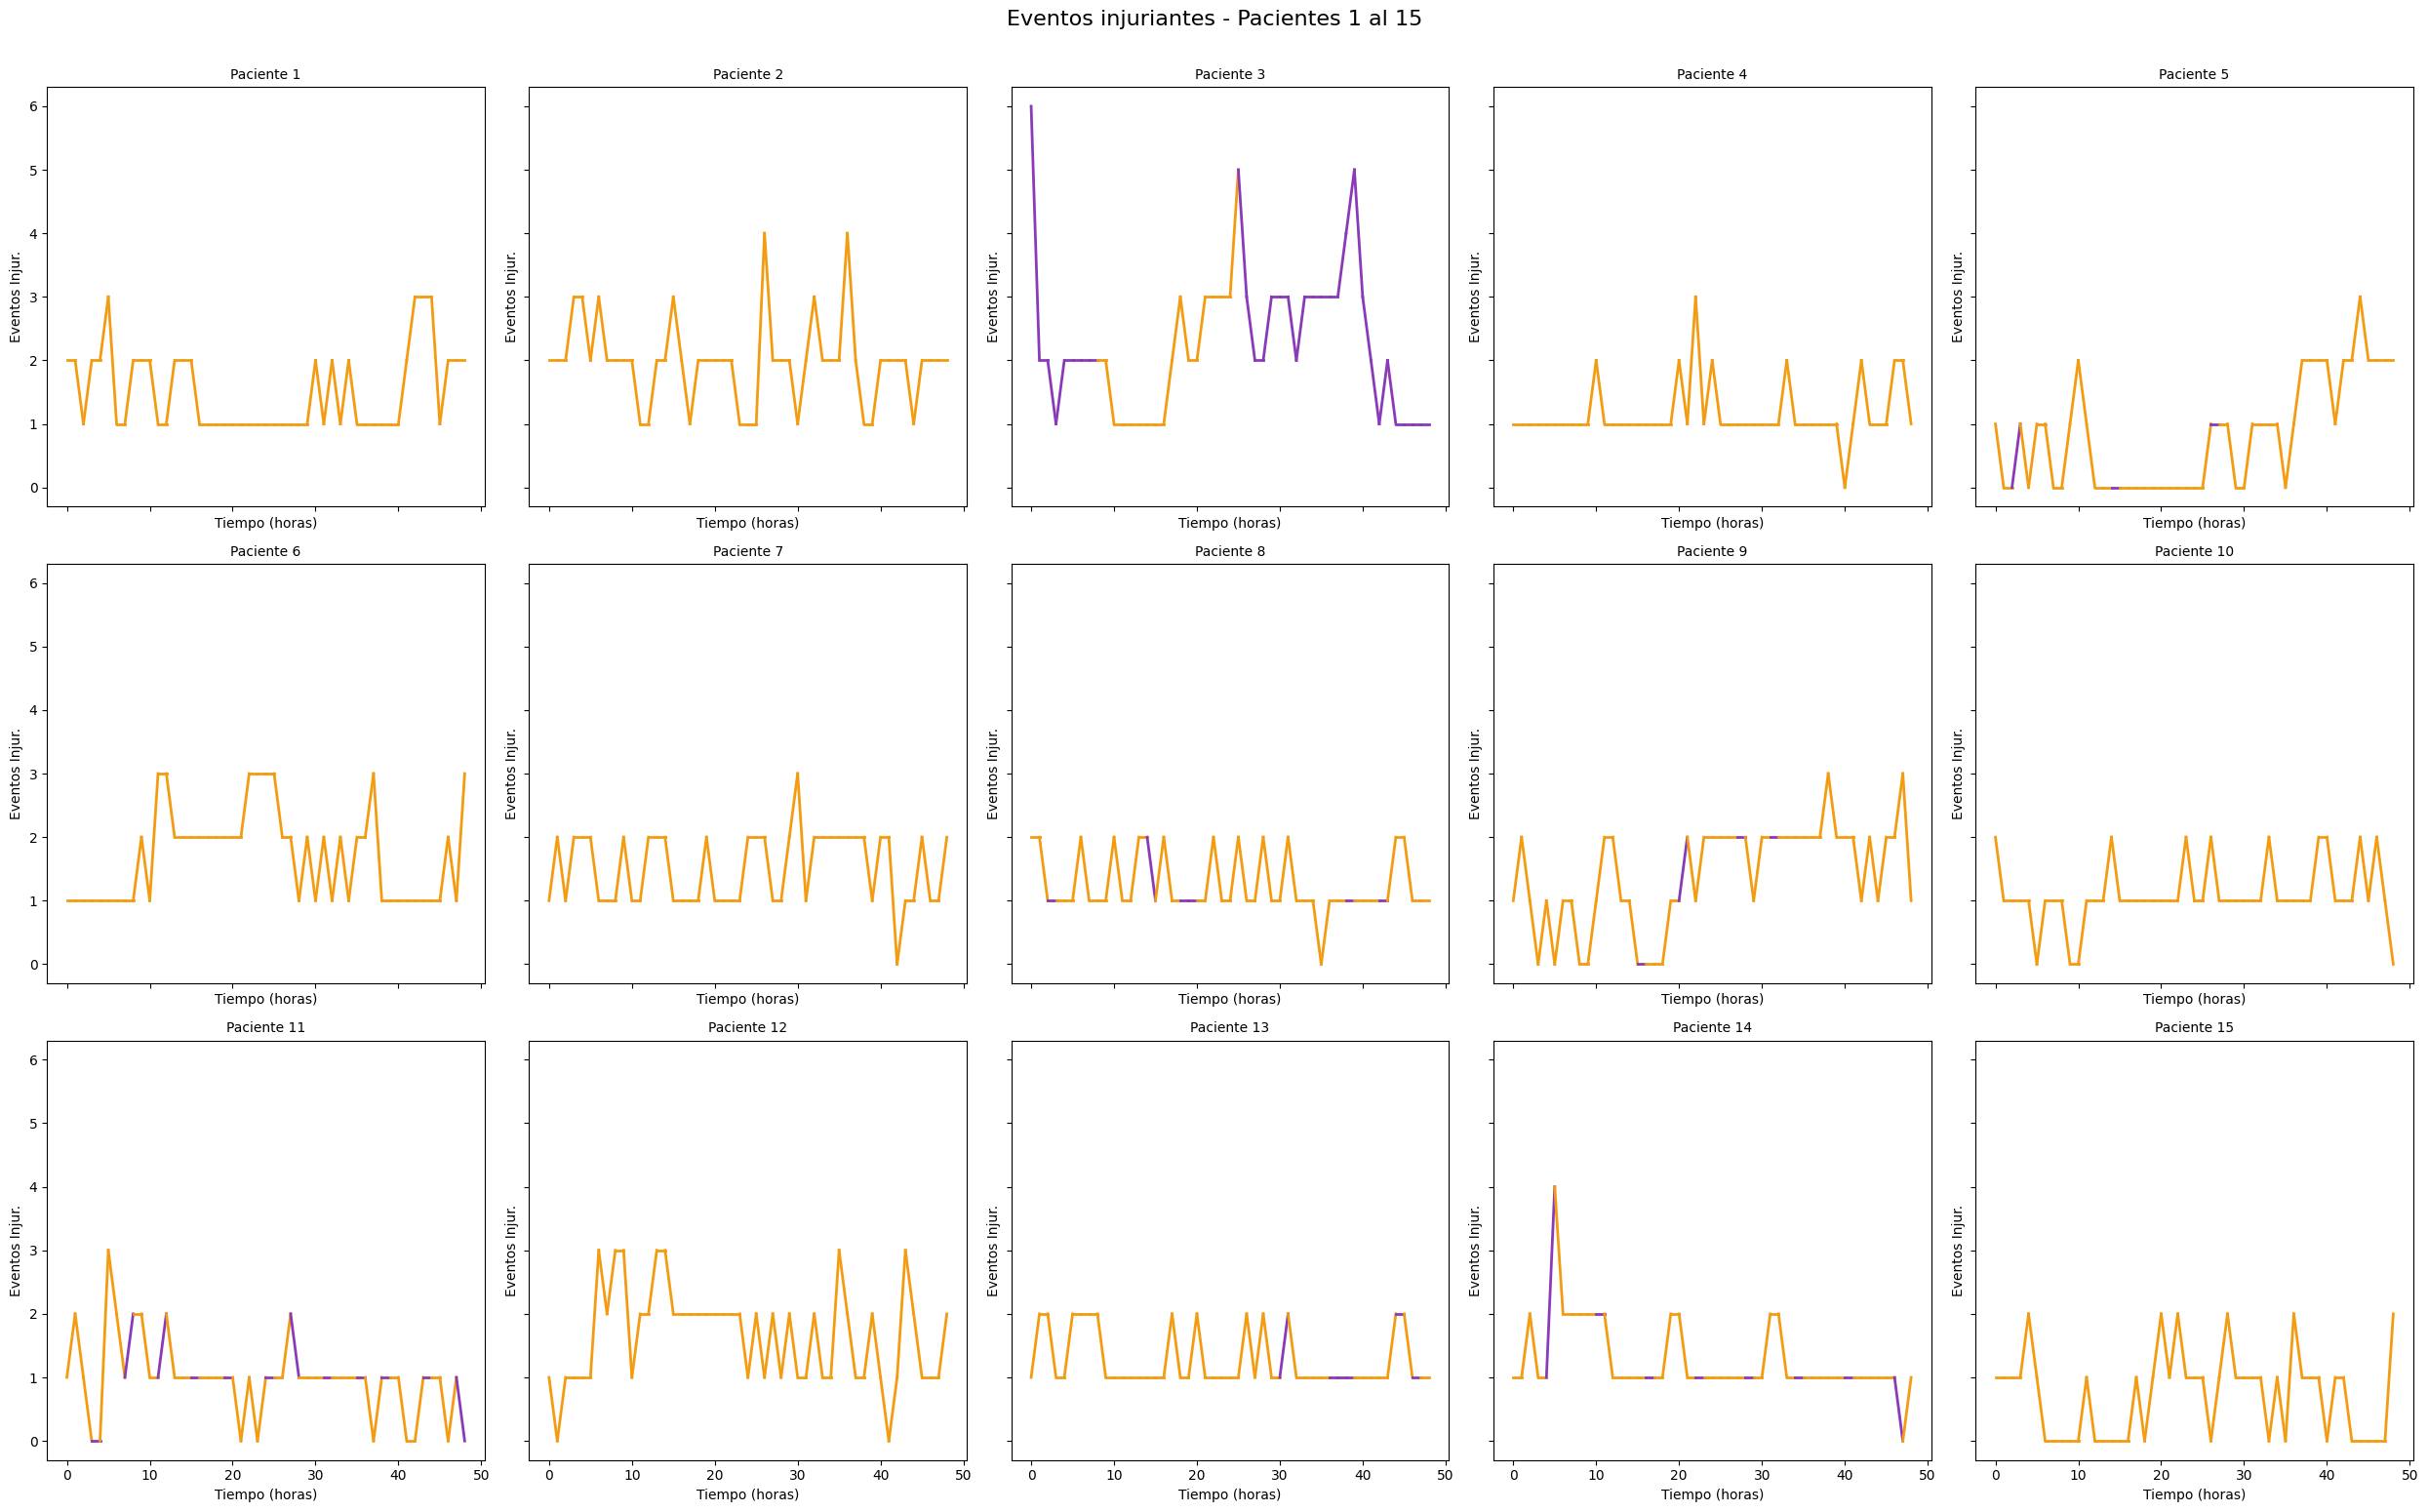

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Colores para la medicación
colores = {1: '#8a3ab9', 2: '#f39c12'}

# Lista de pacientes
pacientes = df['Paciente '].unique()

def graficar_pacientes(pacientes_subset, titulo_general):
    fig, axes = plt.subplots(3, 5, figsize=(25,15), sharex=True, sharey=True)
    axes = axes.flatten()

    for idx, paciente in enumerate(pacientes_subset):
        ax = axes[idx]
        sub_df = df[df['Paciente '] == paciente].sort_values('TiempoNum')

        for i in range(len(sub_df) - 1):
            x = [sub_df.iloc[i]['TiempoNum'], sub_df.iloc[i+1]['TiempoNum']]
            y = [sub_df.iloc[i]['TotalEventosInjuriante'], sub_df.iloc[i+1]['TotalEventosInjuriante']]
            color = colores.get(sub_df.iloc[i]['medicación '], '#cccccc')  # Color por defecto si hay error
            ax.plot(x, y, color=color, linewidth=2)

        ax.set_title(f'Paciente {paciente}', fontsize=10)
        ax.set_xlabel('Tiempo (horas)')
        ax.set_ylabel('Eventos Injur.')

    # Eliminar ejes vacíos si hay menos de 15
    for j in range(len(pacientes_subset), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.suptitle(titulo_general, fontsize=16, y=1.03)
    plt.show()

# Primeros 15 pacientes
graficar_pacientes(pacientes[:15], 'Eventos injuriantes - Pacientes 1 al 15')




Morado: con medicación, Naranja: sin medicación

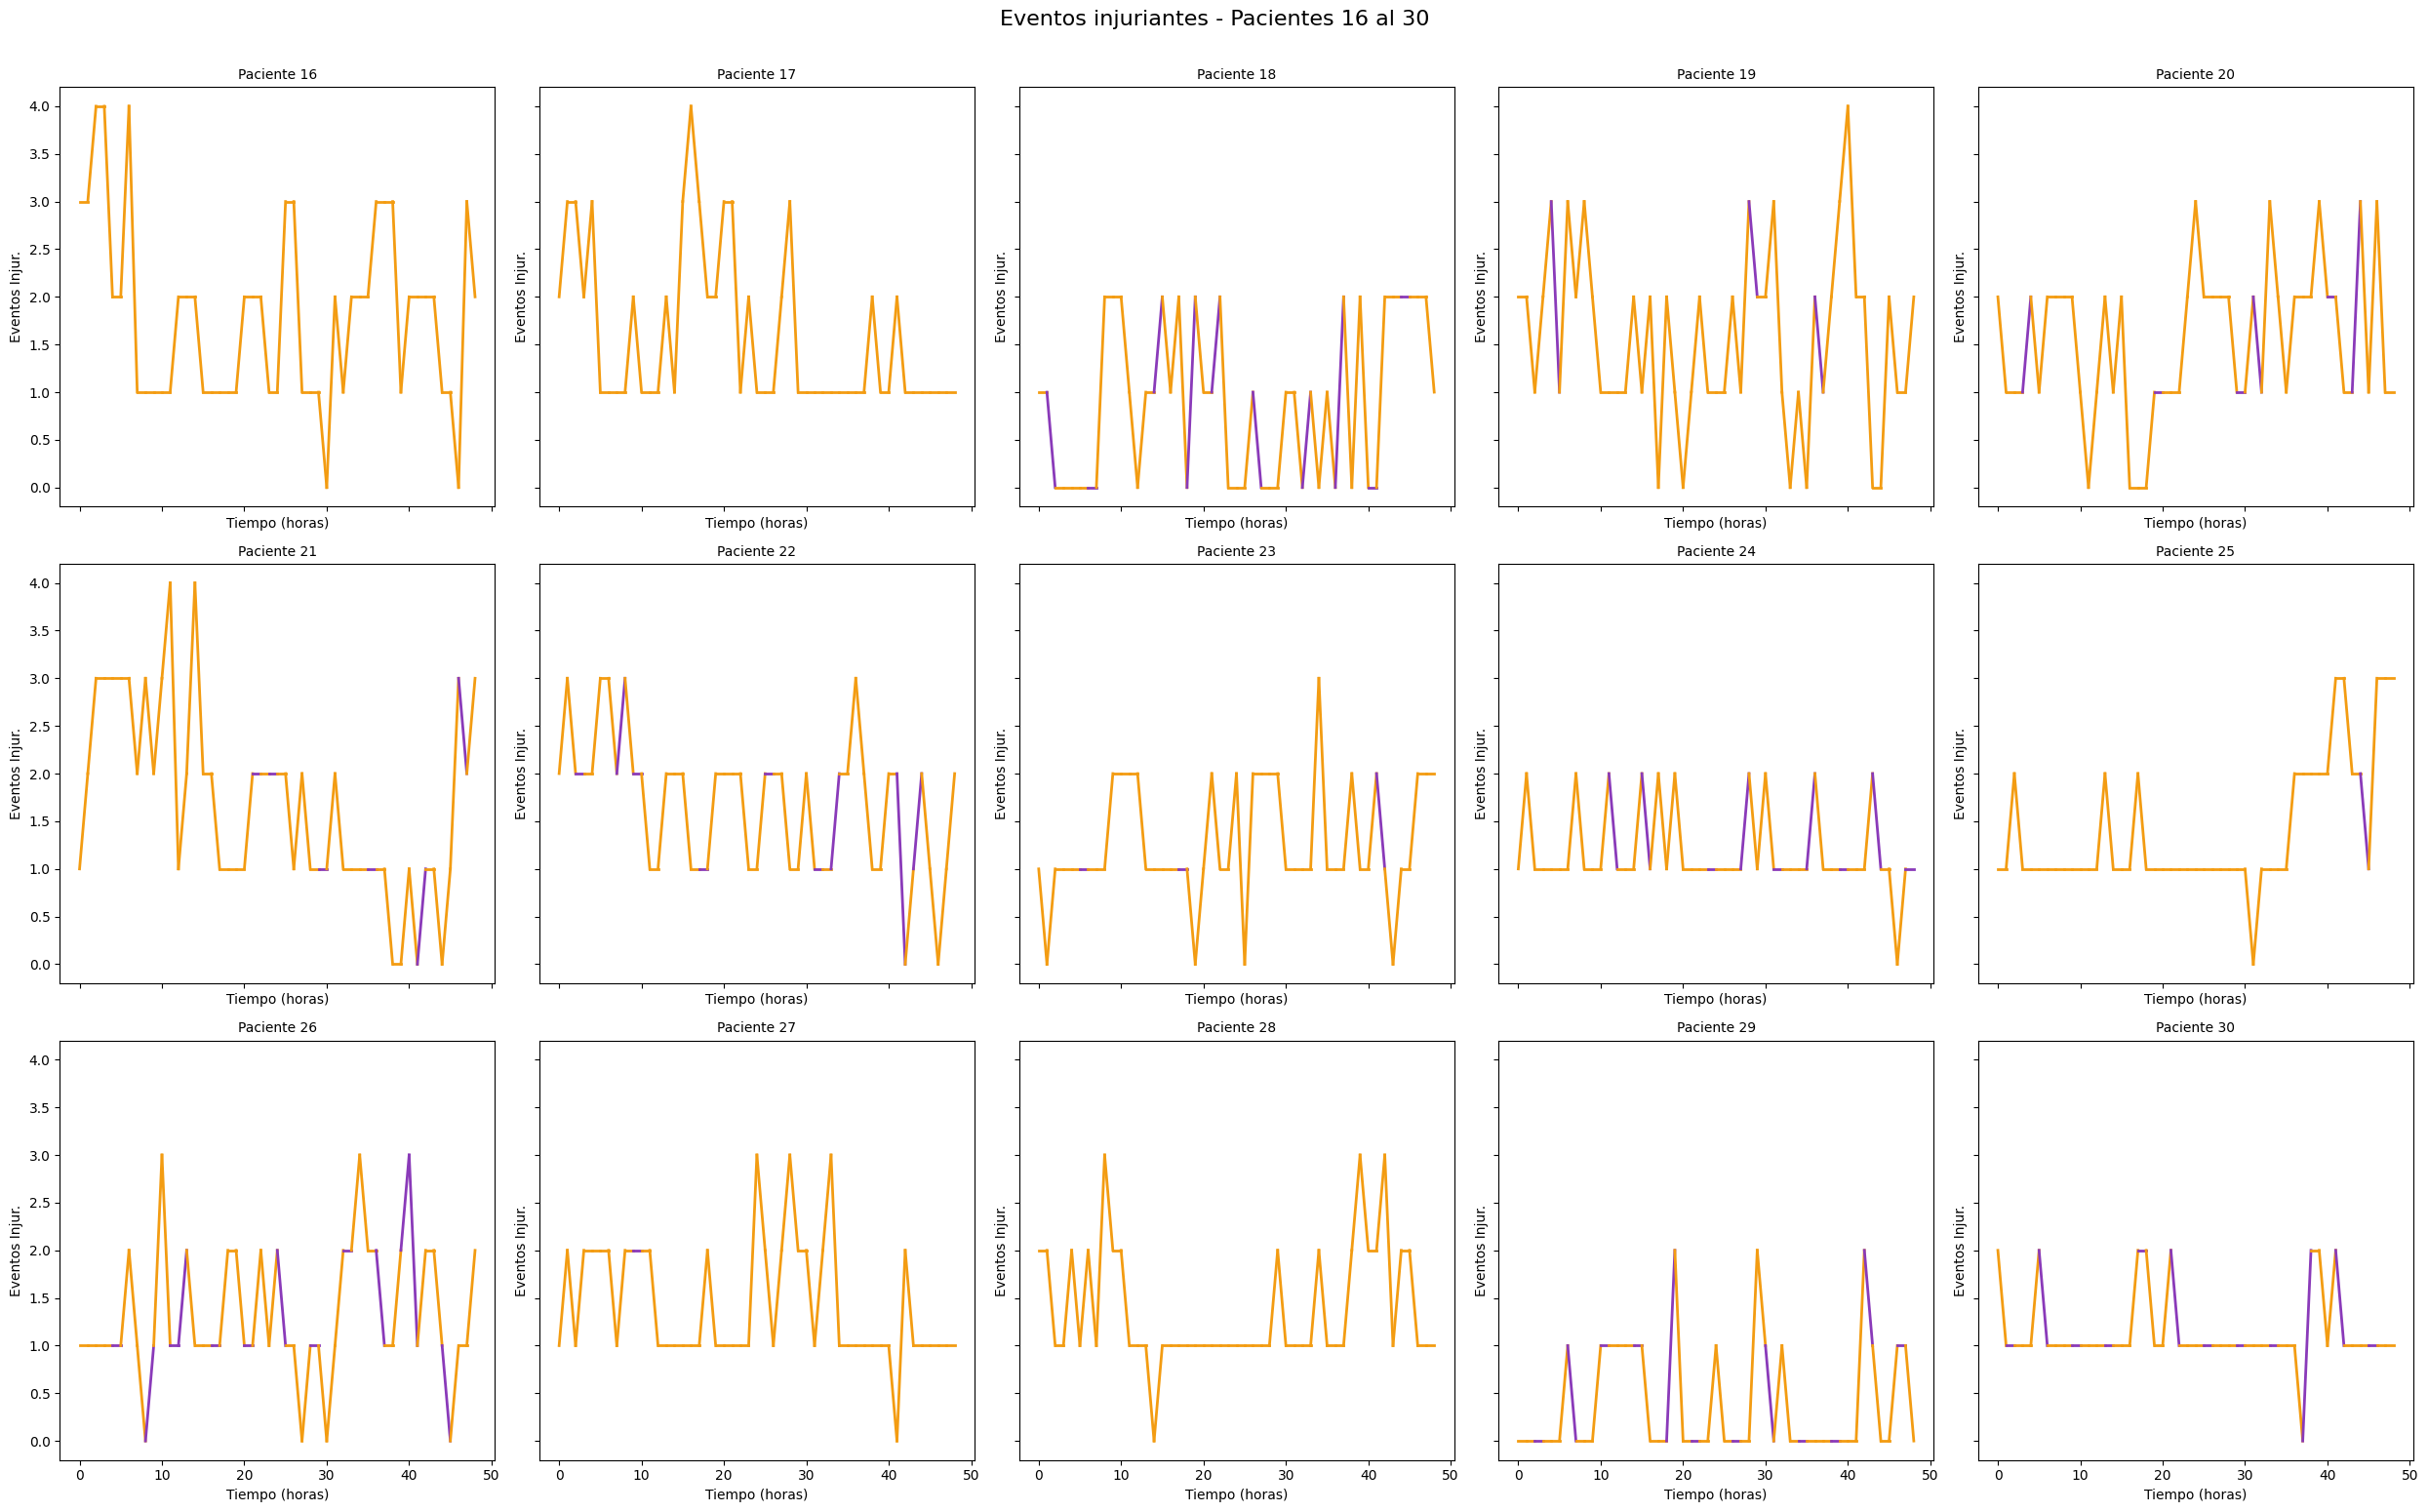

In [ ]:

graficar_pacientes(pacientes[15:30], 'Eventos injuriantes - Pacientes 16 al 30')

 Estos gráficos son para observar la evolución de los eventos injuriantes por paciente a lo largo del tiempo (ojo no es la hora del reloj, son las 49 horas de registro del paciente).

 Cada gráfico representa a un paciente individual y muestra cómo varía la cantidad de eventos con respecto al tiempo que paso hozpitalizado, diferenciando con colores si el paciente recibió medicación (morado) o no (naranja) en cada intervalo.

Recalco que **no habia diferencia significativa con la medicación** por las pruebas que se realizaron, pero de igual lo coloque para que vieran el comportamiento de cada paciente